**Deep Learning project**

***Prediction of Heart Failure using ANN model***

**1. Importing the required libraries for EDA**

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras import Sequential # heps to intialize ANN
from tensorflow.keras.layers import Dense,BatchNormalization, Dropout, LSTM  # help to create layers
from sklearn.metrics import mean_squared_error,confusion_matrix

**2. Loading  the data into dataframe**

**About dataset:**
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

In [45]:
#loading the csv data
data = pd.read_csv("/content/Heart Failure Clinical Records.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
#Attribute Information:
#Numerical Features:

#age: age of the patient (years)
#creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
#ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
#platelets: platelets in the blood (kiloplatelets/mL)
#serum creatinine: level of serum creatinine in the blood (mg/dL)
#serum sodium: level of serum sodium in the blood (mEq/L)
#time: follow-up period (days)

#Categorical Features:
#anaemia: decrease of red blood cells or hemoglobin (boolean)
#high blood pressure: if the patient has hypertension (boolean)
#diabetes: if the patient has diabetes (boolean)
#sex: woman or man (binary)
#smoking: if the patient smokes or not (boolean)

#Target Variable:
#death event: if the patient deceased during the follow-up period (boolean)

**3.EDA**

In [46]:
# gives all information about datatypes and total entries
data.info()  # data has only integer and float values
             # no. of rows=299, no.of columns=13

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [47]:
#Checking null/missing  values in data
data.isnull().sum()    #data has no any null / missing values

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [48]:
# Gives statistically information about numerical column
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [49]:
data.DEATH_EVENT.unique()  # 1 shows that the chances of patient deceased during the follow-up period and 0 shows survived people 

array([1, 0])

In [50]:
#checking the distribution of Target Variable
data["DEATH_EVENT"].value_counts()  

0    203
1     96
Name: DEATH_EVENT, dtype: int64

* 203 patients survived.
* 96 patients deceased.

In [ ]:
# The target variable DEATH_EVENT is discrete and it is a classification problem.

In [51]:
# Normalize can be set to True to print proportions instead of number 
data['DEATH_EVENT'].value_counts(normalize=True)

0    0.67893
1    0.32107
Name: DEATH_EVENT, dtype: float64

* 67.89 % of the patients survived.
* 32.11 % of the patients deceased.

**4.Visualization**

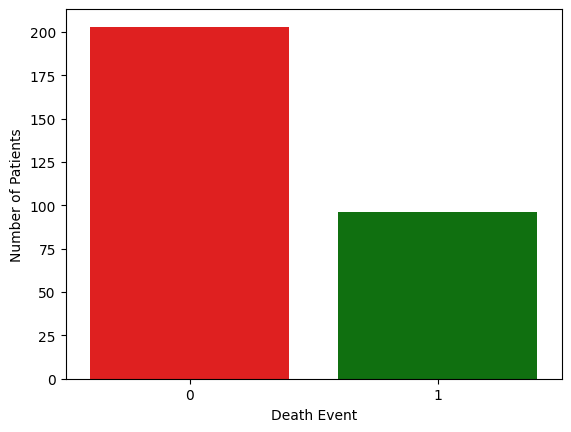

In [ ]:
cols=["Red","Green"]
sns.countplot(x=data["DEATH_EVENT"],palette=cols)
plt.ylabel('Number of Patients')
plt.xlabel('Death Event')
plt.show()

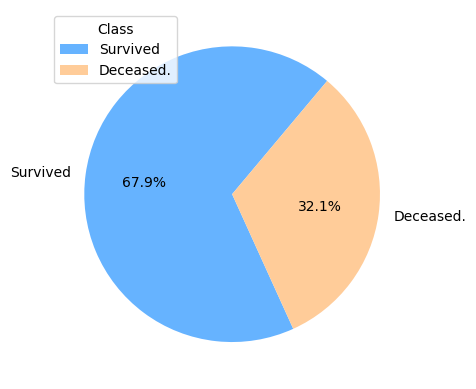

In [ ]:
plt.pie(data["DEATH_EVENT"].value_counts(),labels=['Survived','Deceased.'],autopct='%1.1f%%', startangle=50 ,colors =['#66b3ff','#ffcc99']
)

plt.legend(title = "Class")
plt.show() 

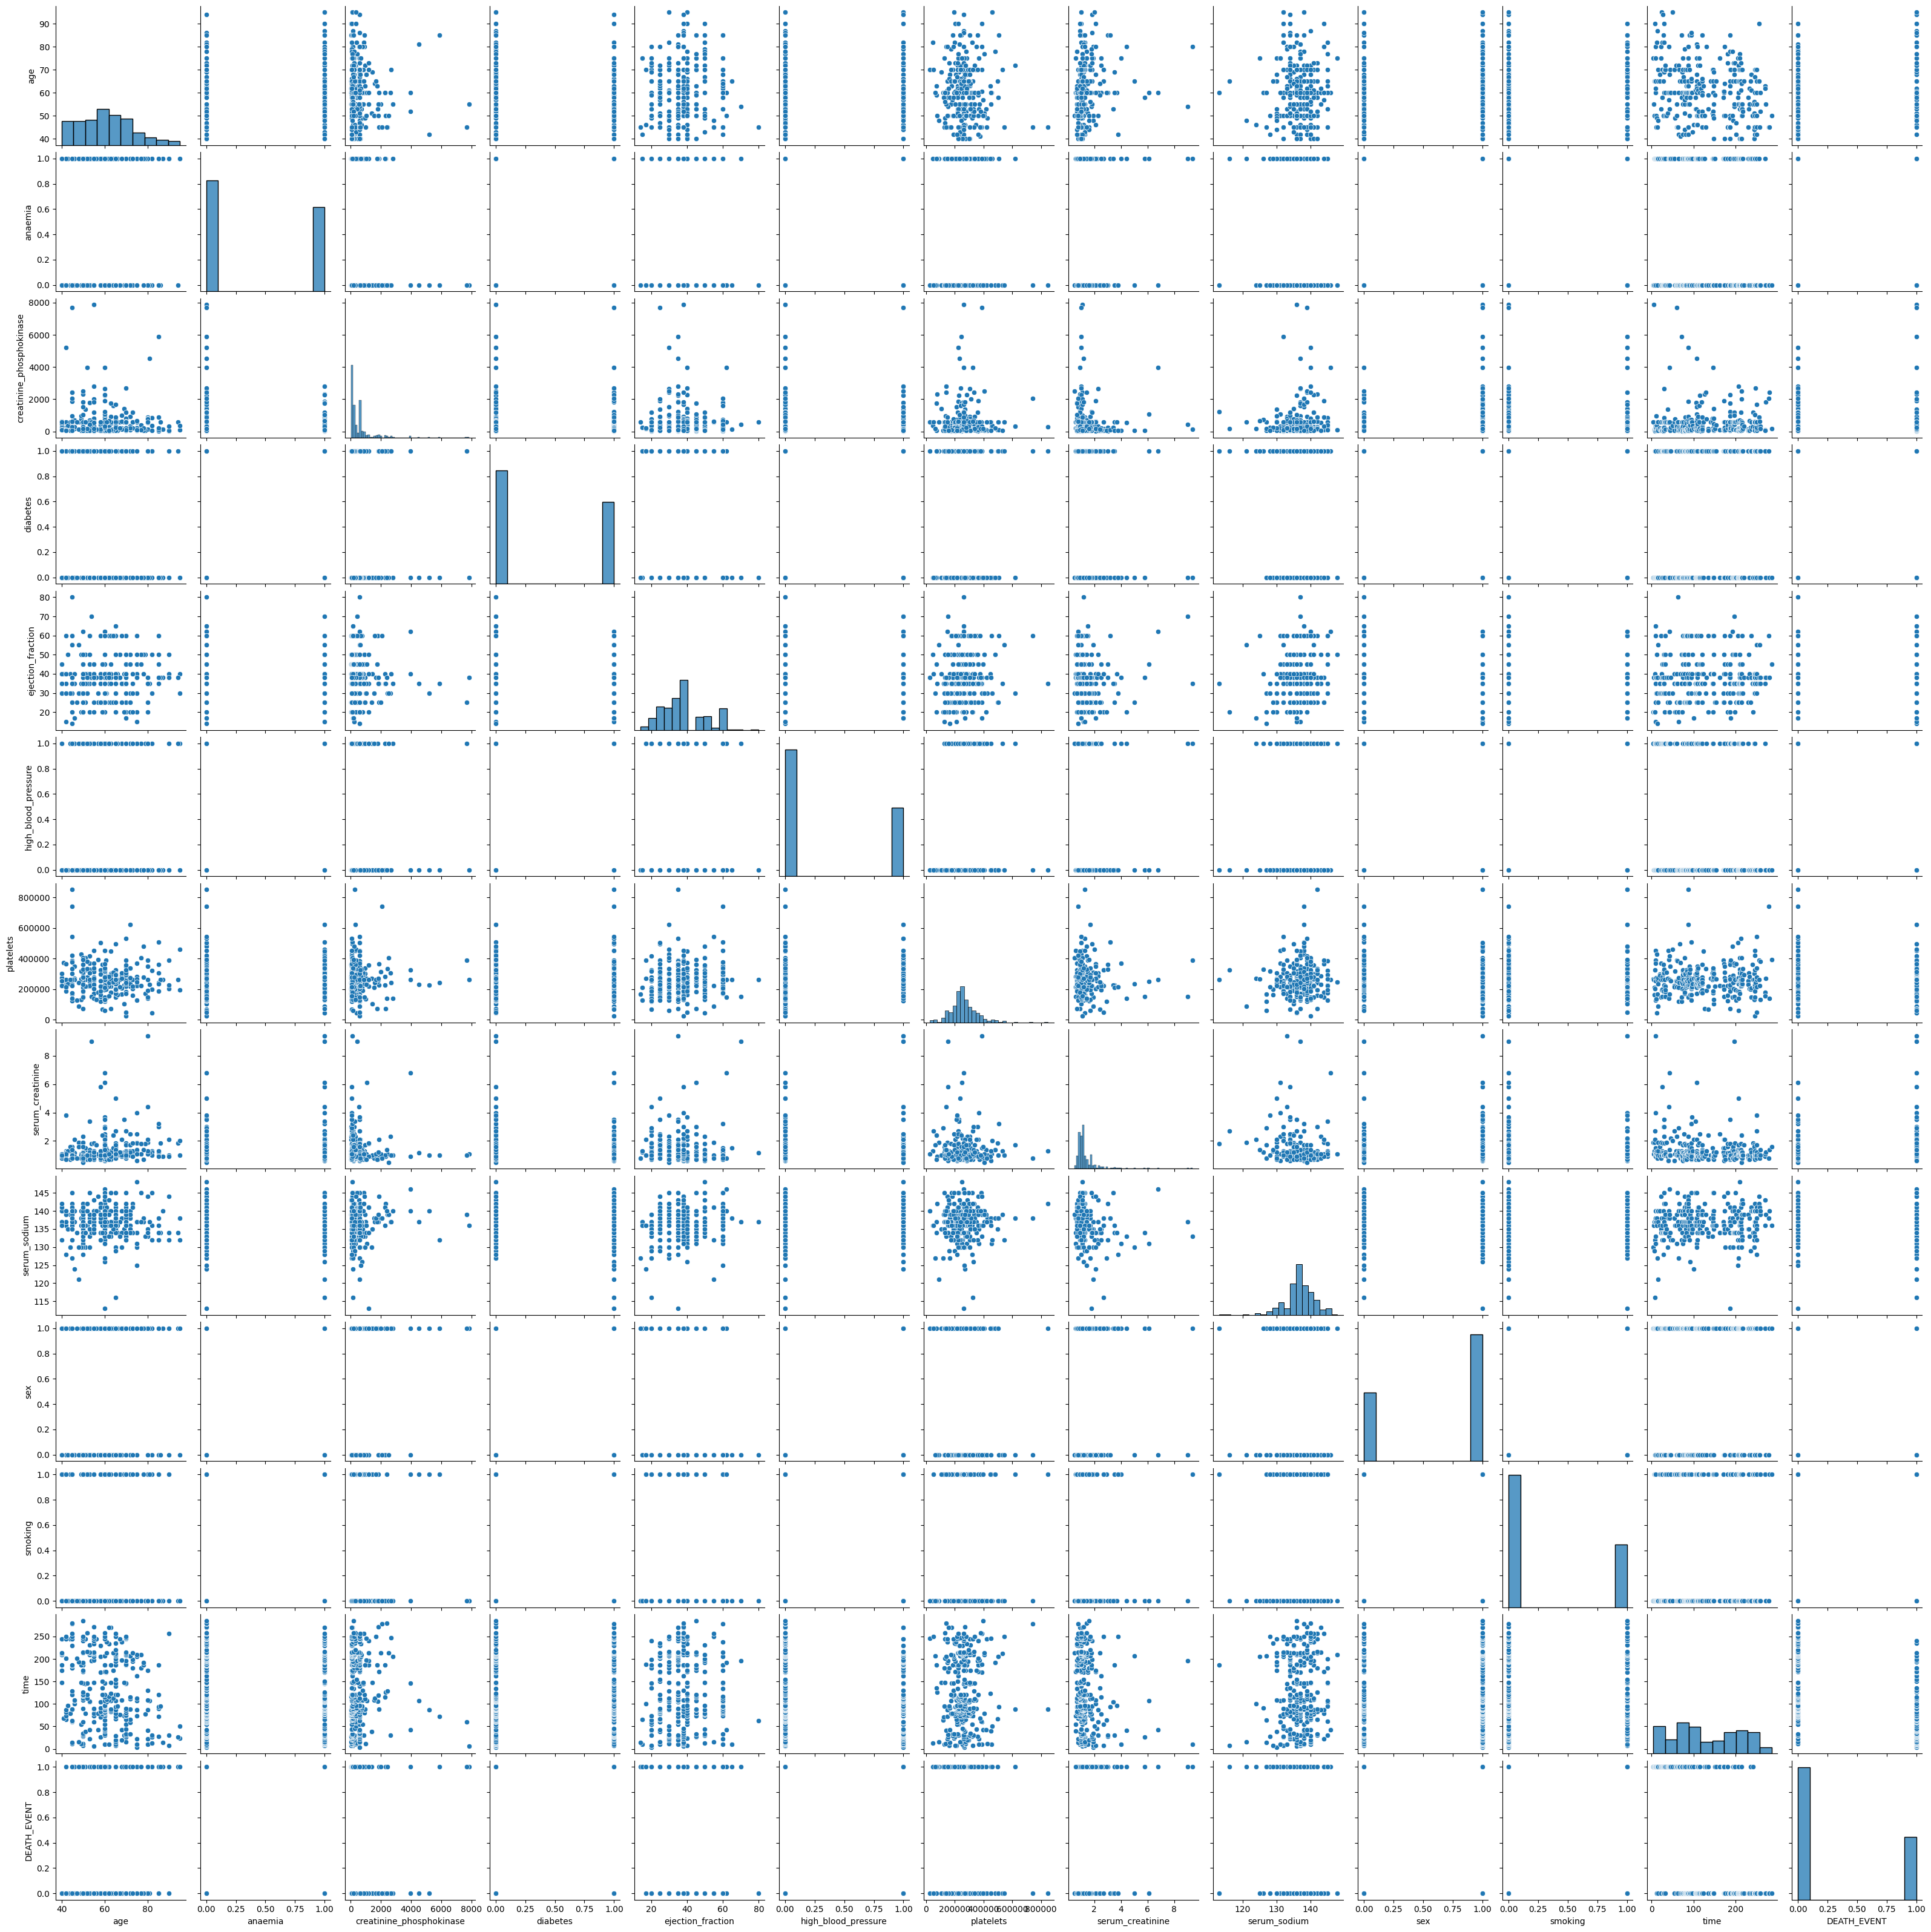

In [ ]:
sns.pairplot(data)

**Heatmap**

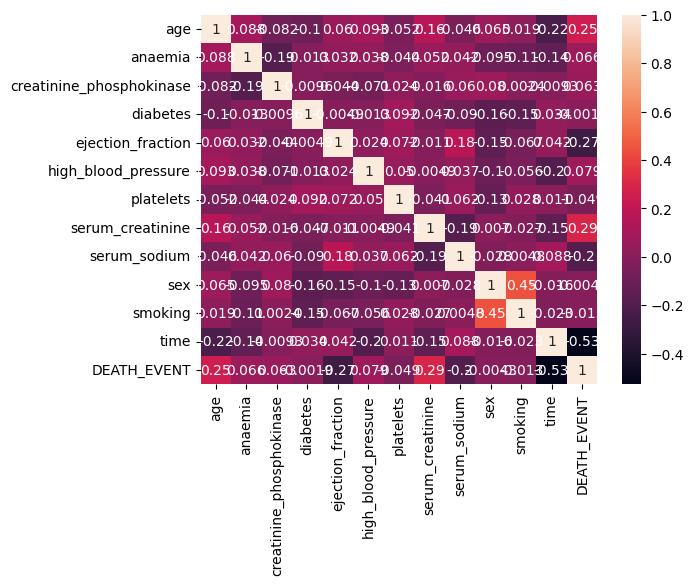

In [ ]:
#correlation matrix shows corelation between numerical data
sns.heatmap(data.corr(),annot = True)
plt.show()

**5.Splitting the Data into Training data & Test Data**
#assigning values to features as X and target as y

In [52]:
# Split the data into input and output variables
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values  # Convert df into numpy array 

In [53]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)  #  test data is 20% and random_state is just to specify data in manner way 


In [54]:
(X.shape),(X_train.shape),(X_test.shape)

((299, 12), (239, 12), (60, 12))

In [55]:
# Scale the input data (StandardScaler() function to standardize the data values into a standard format)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**6. Model Trainning **

In [56]:
# Build the ANN model
# step:1 Initialize the model
model=Sequential()

#step:2 Add layers
model.add(Dense(units=32,activation="relu",input_dim=12)) # Dense use for input layer
model.add(Dense(units=16,activation="relu"))  # hidden layer
model.add(Dense(units=1,activation="sigmoid")) # o/p layer  and sigmoid use for classification problem

In [57]:
# Compile the model
# step:3 Establish the connection between layers
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # optimizer is reduce the loss

In [59]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16,validation_data=(X_test,y_test))# batch size is by default 22 and epochs means number of iterations

Epoch 1/50
15/15 [==============================] - 0s 9ms/step - loss: 0.2032 - accuracy: 0.9247 - val_loss: 0.3685 - val_accuracy: 0.8500
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.1997 - accuracy: 0.9331 - val_loss: 0.3678 - val_accuracy: 0.8500
Epoch 3/50
15/15 [==============================] - 0s 6ms/step - loss: 0.1982 - accuracy: 0.9331 - val_loss: 0.3736 - val_accuracy: 0.8333
Epoch 4/50
15/15 [==============================] - 0s 6ms/step - loss: 0.1926 - accuracy: 0.9372 - val_loss: 0.3735 - val_accuracy: 0.8667
Epoch 5/50
15/15 [==============================] - 0s 5ms/step - loss: 0.1895 - accuracy: 0.9414 - val_loss: 0.3718 - val_accuracy: 0.8667
Epoch 6/50
15/15 [==============================] - 0s 6ms/step - loss: 0.1856 - accuracy: 0.9414 - val_loss: 0.3724 - val_accuracy: 0.8333
Epoch 7/50
15/15 [==============================] - 0s 5ms/step - loss: 0.1817 - accuracy: 0.9498 - val_loss: 0.3742 - val_accuracy: 0.8500
Epoch 8/50
15/15 [==

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                416       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


<Axes: >

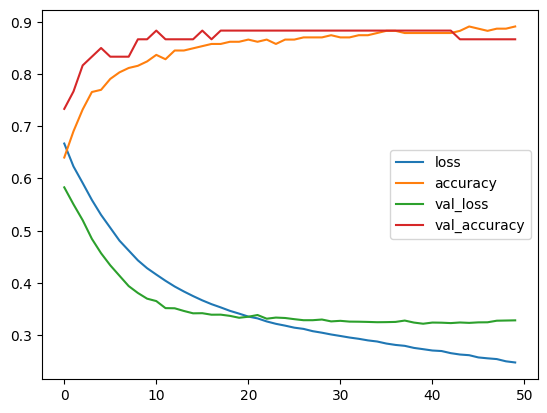

In [ ]:
lossdf=pd.DataFrame(model.history.history)  
lossdf.plot()           

In [61]:
##step 5 prediction
ypred=model.predict(X_test)
#step 6 set threshold
ypred=ypred>0.5


2/2 [==============================] - 0s 6ms/step


**7. Accuracy of model**

In [38]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

2/2 [==============================] - 0s 12ms/step - loss: 0.4532 - accuracy: 0.8500
Test Accuracy: 0.8500000238418579


**This ANN model gives  85.00% accuracy.**

**8. Prediction of model**

In [62]:
pred1=model.predict(scaler.transform([[75.0,	1,	246,	0,	15,	0,	127000.00,	1.2,	137,	1,	0,	10	]]))
if(pred1>0.5):
  print(1)
  print("Heart failure")
else:
  print(0)
  print("Heart not failure")


1/1 [==============================] - 0s 27ms/step
1
Heart failure


In [ ]:
# Above model predict 1, that shows the patient does deceased(heart failure) during the follow-up period

In [63]:
pred2=model.predict(scaler.transform([[62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270]]))
if(pred2>0.5):
  print(1)
  print("Heart failure")
else:
  print(0)
  print("Heart not failure")

1/1 [==============================] - 0s 27ms/step
0
Heart not failure


In [ ]:
# Above model predict 0, that shows the patient does not deceased(heart failure) during the follow-up period

**9. Saving Model**

In [65]:
from tensorflow.keras.models import load_model
model.save("heart_failure_model")

In [66]:
storedmodel=load_model("heart_failure_model")

**In this project, ANN model with two hidden layers and an output layer. The model is trained on a dataset containing 12 input features and a binary output indicating the presence or absence of heart failure. The dataset is split into training and testing sets, and the input data is standardized using the StandardScaler from scikit-learn. The model is then compiled with binary crossentropy loss and trained for 50 epochs using mini-batch gradient descent. Finally, the model is evaluated on the test set and used to make predictions on new data.**